In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('machines.csv', index_col=0)
dataset.columns = ['Vendor_name', 'model', 'MCYT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

### 5.a

MCYT        AxesSubplot(0.125,0.125;0.0824468x0.755)
MMIN     AxesSubplot(0.223936,0.125;0.0824468x0.755)
MMAX     AxesSubplot(0.322872,0.125;0.0824468x0.755)
CACH     AxesSubplot(0.421809,0.125;0.0824468x0.755)
CHMIN    AxesSubplot(0.520745,0.125;0.0824468x0.755)
CHMAX    AxesSubplot(0.619681,0.125;0.0824468x0.755)
PRP      AxesSubplot(0.718617,0.125;0.0824468x0.755)
ERP      AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

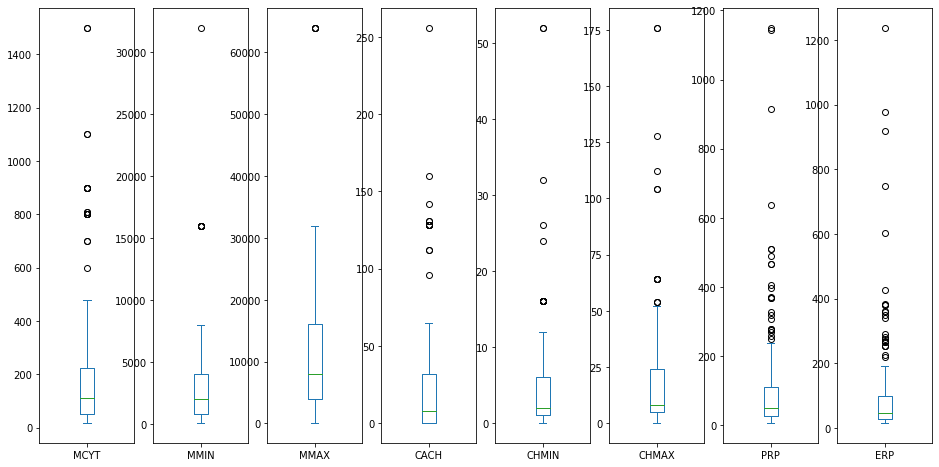

In [9]:
dataset.plot.box(subplots=True, figsize=(2*8, 8))

It seems there are outliers present in some of the columns. for instance, in the MMIN column there are values beyond 30000 while the box is around 1000 to 4000. This is also true dor MMAX column. all other columns have several values outside the box as well.

### 5.b

In [19]:
numerics_col = dataset.select_dtypes('number').columns
zscored_df = dataset.copy()
zscored_df.loc[:, numerics_col] = zscored_df.loc[:, numerics_col].apply(lambda z: (z - z.mean()) / z.std(), axis=0)

In [42]:
outlier_indcs = zscored_df.loc[((zscored_df[numerics_col] < -3) | (zscored_df[numerics_col] > 3)).values].index
cdf1 = dataset.drop(outlier_indcs, axis=0).reset_index(drop=True)
cdf1

,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
182,sperry,80/8,124,1000,8000,0,1,8,42,37
183,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
184,sratus,32,125,2000,8000,0,2,14,52,41
185,wang,vs-100,480,512,8000,32,0,0,67,47


In [41]:
f'Removed Rows Count: {dataset.shape[0] - cdf1.shape[0]}'

'Removed Rows Count: 21'

### 5.c

In [47]:
numerics_col = dataset.select_dtypes('number').columns
quan3 = dataset[numerics_col].quantile(0.75)
quan1 = dataset[numerics_col].quantile(0.25)
iqr_values = quan3 - quan1
outlier_indcs = dataset.loc[
    ((dataset[numerics_col] > quan3 + 1.5 * iqr_values) | (dataset[numerics_col] < quan1 - 1.5 * iqr_values)).values
].index

cdf2 = dataset.drop(outlier_indcs, axis=0).reset_index(drop=True)
cdf2

,Vendor_name,model,MCYT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
1,apollo,dn320,400,1000,3000,0,1,2,38,23
2,apollo,dn420,400,512,3500,4,1,6,40,24
3,basf,7/65,60,2000,8000,65,1,8,92,70
4,basf,7/68,50,4000,16000,65,1,8,138,117
...,...,...,...,...,...,...,...,...,...,...
144,sperry,80/8,124,1000,8000,0,1,8,42,37
145,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
146,sratus,32,125,2000,8000,0,2,14,52,41
147,wang,vs-100,480,512,8000,32,0,0,67,47


In [48]:
f'Removed Rows Count: {dataset.shape[0] - cdf2.shape[0]}'

'Removed Rows Count: 59'